In [1]:
import sys
sys.path.append('..')

from models.cat_dog_model import CatDogModel
from dataset import CatDogDataModule

/home/vedpatel/.conda/envs/pyml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch

model = CatDogModel().to('cuda' if torch.cuda.is_available() else 'cpu')

print(model)

CatDogModel(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2d

/home/vedpatel/.conda/envs/pyml/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vedpatel/.conda/envs/pyml/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
dataset = CatDogDataModule(data_dir="../../data/PetImages")
dataset.setup()

In [ ]:
sample_imgs, sample_labels = next(iter(dataset.train_dataloader()))
sample_imgs = sample_imgs.to('cuda' if torch.cuda.is_available() else 'cpu')

outputs = model(sample_imgs)

Output shape: torch.Size([32, 2])


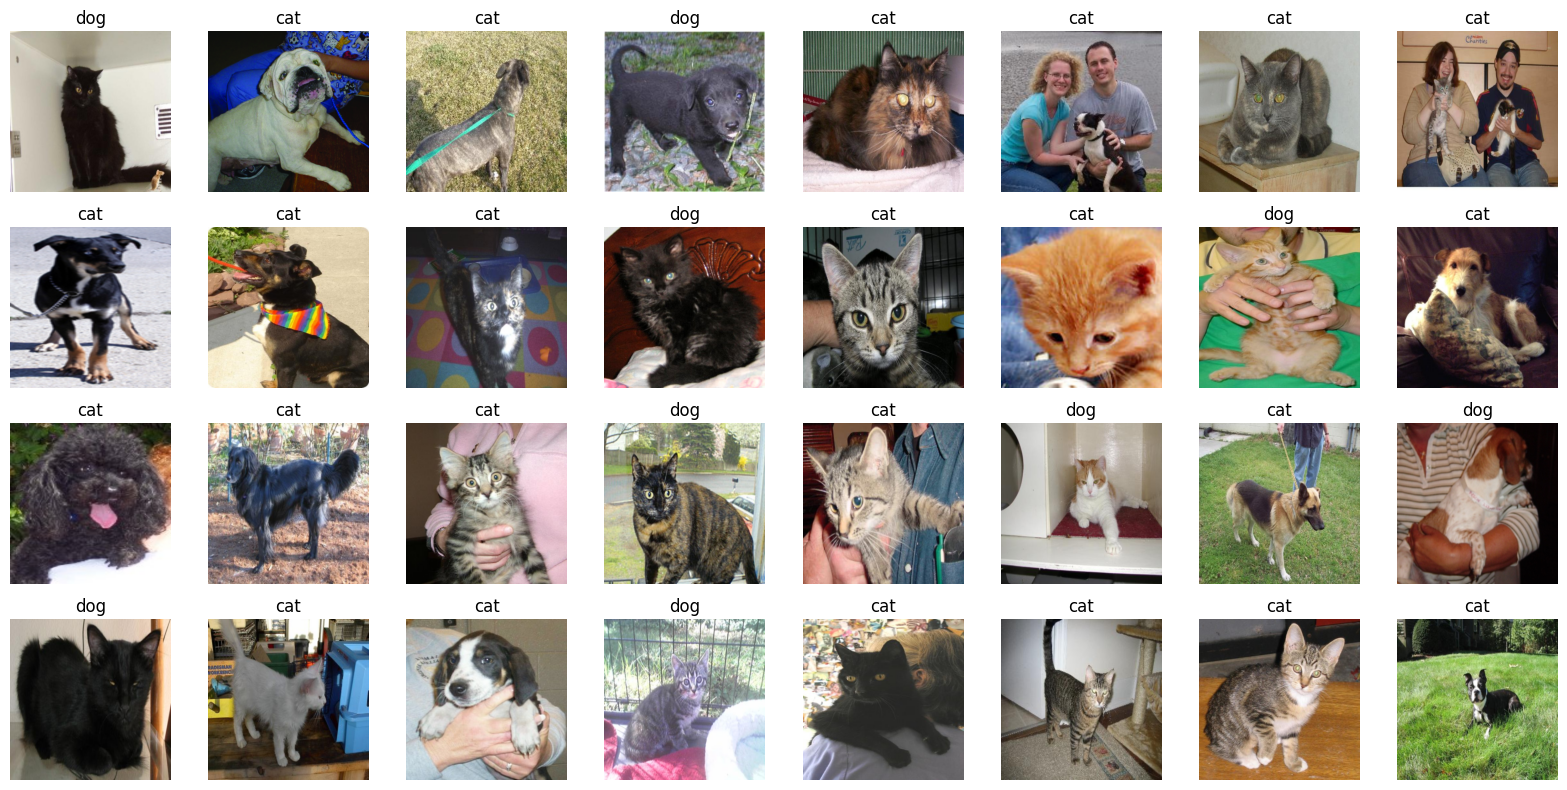

Model accuracy rate: 39.27%


In [17]:
from torchmetrics.classification import MulticlassAccuracy


import matplotlib.pyplot as plt

imgs = sample_imgs.cpu()
labels = sample_labels.cpu()
preds = outputs.cpu()

fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.flatten()

for i in range(len(imgs)):
    img = imgs[i].permute(1, 2, 0).numpy()
    pred_label = "cat" if preds[i, 0] > preds[i, 1] else "dog"
    axes[i].imshow(img)
    axes[i].set_title(pred_label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

accuracy = MulticlassAccuracy(num_classes=2)
acc = accuracy(preds, labels)
print(f"Model accuracy rate: {acc.item():.2%}")